<img src="img/Geneva_School_of_Economics_and_Management.png"/>

# Machine Learning 2021 Final Project Notebook
## Written by Karen Manukyan & Mikail Kurt

In this project we worked on text data which was taken from social media platform Twitter. The train data has 1280000 tweets with 7 columns. The test data includes 320000 tweets and 6 columns. The only difference from train data is test data does not include the emotion column about corresponding tweet.

Content of Notebook
- Reading Datasets <br>
- Exploratory Data Analysis <br>
- Data Visualization <br>
- Data Cleaning <br>
- Tokenization <br>
- Implementation of Machine Learning Algortihms <br>
- Conclusion 

# Importing Libraries

In [51]:
# import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import numpy as np
import re #regex operations
import contractions #expanding contractions
import nltk
from scipy.sparse import hstack
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


# Reading Dataset

traindf = pd.read_csv("MLUnige2021_train.csv")
testdf = pd.read_csv("MLUnige2021_test.csv")

## Exploratory Data Analysis

#### We will use the date, emotion and text column for analyze and training machine learning algorithms.

In [3]:
traindf.head() #Displaying first 5 rows of train data

,Id,emotion,tweet_id,date,lyx_query,user,text
0,0,1,2063391019,Sun Jun 07 02:28:13 PDT 2009,NO_QUERY,BerryGurus,@BreeMe more time to play with you BlackBerry ...
1,1,0,2000525676,Mon Jun 01 22:18:53 PDT 2009,NO_QUERY,peterlanoie,Failed attempt at booting to a flash drive. Th...
2,2,0,2218180611,Wed Jun 17 22:01:38 PDT 2009,NO_QUERY,will_tooker,@msproductions Well ain't that the truth. Wher...
3,3,1,2190269101,Tue Jun 16 02:14:47 PDT 2009,NO_QUERY,sammutimer,@Meaghery cheers Craig - that was really sweet...
4,4,0,2069249490,Sun Jun 07 15:31:58 PDT 2009,NO_QUERY,ohaijustin,I was reading the tweets that got send to me w...


In [4]:
testdf.tail() #Displaying last 5 rows of test data

,Id,tweet_id,date,lyx_query,user,text
319995,319995,1687217037,Sun May 03 08:05:48 PDT 2009,NO_QUERY,brianwperry,@davidgregory How is it that MTP isn't in HiDe...
319996,319996,2177859733,Mon Jun 15 06:49:14 PDT 2009,NO_QUERY,sp2peepee,im thinking about this long shot for a long ti...
319997,319997,1956949575,Thu May 28 23:06:24 PDT 2009,NO_QUERY,essential_e,@meg___ i feel so old.. i'll be 22 in september
319998,319998,2015389809,Wed Jun 03 04:32:05 PDT 2009,NO_QUERY,gretadelonge,watching supernatural ahah poor they. in jail
319999,319999,2231627501,Thu Jun 18 18:48:44 PDT 2009,NO_QUERY,FourbyFord,@queenmisha but you're not following me


In [5]:
print("The shape of train data is: ",traindf.shape)
print("The shape of test data is: ",testdf.shape)

The shape of train data is:  (1280000, 7)
The shape of test data is:  (320000, 6)


In [6]:
traindf.info() #There is no NA values in trainset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280000 entries, 0 to 1279999
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Id         1280000 non-null  int64 
 1   emotion    1280000 non-null  int64 
 2   tweet_id   1280000 non-null  int64 
 3   date       1280000 non-null  object
 4   lyx_query  1280000 non-null  object
 5   user       1280000 non-null  object
 6   text       1280000 non-null  object
dtypes: int64(3), object(4)
memory usage: 68.4+ MB


In [7]:
testdf.info() #there is no NA values in test 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320000 entries, 0 to 319999
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Id         320000 non-null  int64 
 1   tweet_id   320000 non-null  int64 
 2   date       320000 non-null  object
 3   lyx_query  320000 non-null  object
 4   user       320000 non-null  object
 5   text       320000 non-null  object
dtypes: int64(2), object(4)
memory usage: 14.6+ MB


#### The  length of negative tweets is slightly higher than positive tweets.

In [8]:
traindf['text_len'] =traindf['text'].apply(lambda x:len(re.findall(r'\w+', x))) #finding length of text column
traindf.groupby(by=["emotion"])["text_len"].mean() #the negative emotion tweets lenght is slightly higher than positive tweets

emotion
0    14.194970
1    13.412232
Name: text_len, dtype: float64

#### The target variable is balanced in terms of class counts.

In [66]:
traindf["emotion"].value_counts()

1    640118
0    639882
Name: emotion, dtype: int64

#### The lyx_query column has only NO_QUERY option.

In [68]:
traindf["lyx_query"].value_counts()

NO_QUERY    1280000
Name: lyx_query, dtype: int64

#### Expanding date columns for both train and test sets

In [9]:
traindf[['Day of Week','Month','Day','Time','Time Zone','Year']]=traindf['date'].str.split(expand=True)
traindf[['Day of Week','Month','Day','Time','Time Zone','Year']] =traindf[['Day of Week','Month','Day','Time','Time Zone','Year']].astype('category')
testdf[['Day of Week','Month','Day','Time','Time Zone','Year']]=testdf['date'].str.split(expand=True)
testdf[['Day of Week','Month','Day','Time','Time Zone','Year']] =testdf[['Day of Week','Month','Day','Time','Time Zone','Year']].astype('category')

In [10]:
traindf.head()

,Id,emotion,tweet_id,date,lyx_query,user,text,text_len,Day of Week,Month,Day,Time,Time Zone,Year
0,0,1,2063391019,Sun Jun 07 02:28:13 PDT 2009,NO_QUERY,BerryGurus,@BreeMe more time to play with you BlackBerry ...,9,Sun,Jun,07,02:28:13,PDT,2009
1,1,0,2000525676,Mon Jun 01 22:18:53 PDT 2009,NO_QUERY,peterlanoie,Failed attempt at booting to a flash drive. Th...,26,Mon,Jun,01,22:18:53,PDT,2009
2,2,0,2218180611,Wed Jun 17 22:01:38 PDT 2009,NO_QUERY,will_tooker,@msproductions Well ain't that the truth. Wher...,26,Wed,Jun,17,22:01:38,PDT,2009
3,3,1,2190269101,Tue Jun 16 02:14:47 PDT 2009,NO_QUERY,sammutimer,@Meaghery cheers Craig - that was really sweet...,14,Tue,Jun,16,02:14:47,PDT,2009
4,4,0,2069249490,Sun Jun 07 15:31:58 PDT 2009,NO_QUERY,ohaijustin,I was reading the tweets that got send to me w...,29,Sun,Jun,07,15:31:58,PDT,2009


In [11]:
traindf[['Hour','Minutes','Seconds']]=traindf['Time'].str.split(":",expand=True)
testdf[['Hour','Minutes','Seconds']]=testdf['Time'].str.split(":",expand=True)
traindf = traindf.drop(["Minutes","Seconds"],axis=1)
testdf = testdf.drop(["Minutes","Seconds"],axis=1)

 #### We will use expanded date column to see whether there will be an improvement in terms of accuracy

In [12]:
newtraindf= traindf[["Day of Week","Month","Day","Hour"]]
newtestdf= testdf[["Day of Week","Month","Day","Hour"]]
newtraindf.head()

,Day of Week,Month,Day,Hour
0,Sun,Jun,07,02
1,Mon,Jun,01,22
2,Wed,Jun,17,22
3,Tue,Jun,16,02
4,Sun,Jun,07,15


In [13]:
newtestdf.head()

,Day of Week,Month,Day,Hour
0,Tue,Jun,02,22
1,Mon,Jun,01,18
2,Sun,May,03,22
3,Fri,May,22,07
4,Sun,Jun,21,09


#### We dummified values in expanded date column.

In [14]:
newtraindfdum = pd.get_dummies(newtraindf,drop_first=True)
newtestdfdum = pd.get_dummies(newtestdf,drop_first=True)
newtraindfdum.head()

,Day of Week_Mon,Day of Week_Sat,Day of Week_Sun,Day of Week_Thu,Day of Week_Tue,Day of Week_Wed,Month_Jun,Month_May,Day_02,Day_03,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [15]:
newtestdfdum.head()

,Day of Week_Mon,Day of Week_Sat,Day of Week_Sun,Day of Week_Thu,Day of Week_Tue,Day of Week_Wed,Month_Jun,Month_May,Day_02,Day_03,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,0,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Visualization

####  Most of tweets are tweeted Sunday and least tweets are tweeted on Wednesday. 

Text(0, 0.5, 'Count')

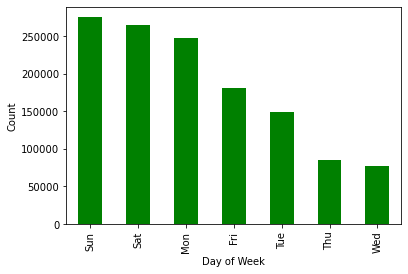

In [16]:
byDay = traindf.groupby(by=["Day of Week"])["Id"].count()
ax=byDay.sort_values(ascending=False).plot(kind='bar',colormap="ocean")
ax.set_xlabel("Day of Week")
ax.set_ylabel("Count")

####  Most of tweets are tweeted 1st, 6th and 7th days of months.

Text(0, 0.5, 'Count')

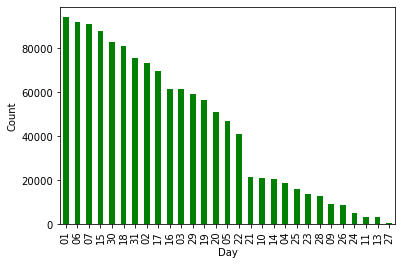

In [17]:
byDay = traindf.groupby(by=["Day"])["Id"].count()
ax=byDay.sort_values(ascending=False).plot(kind='bar',colormap="ocean")
ax.set_xlabel("Day")
ax.set_ylabel("Count")

#### All tweets are tweeted in 2009.

Text(0, 0.5, 'Count')

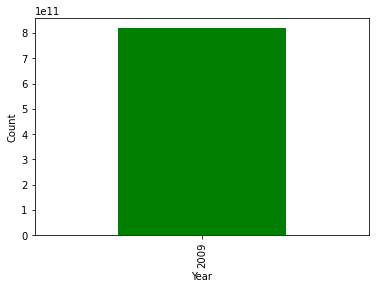

In [18]:
byDay = traindf.groupby(by=["Year"])["Id"].sum()
ax=byDay.sort_values(ascending=False).plot(kind='bar',colormap="ocean",sort_columns=True)
ax.set_xlabel("Year")
ax.set_ylabel("Count")

#### All tweets  are from April ,May and June 2009.

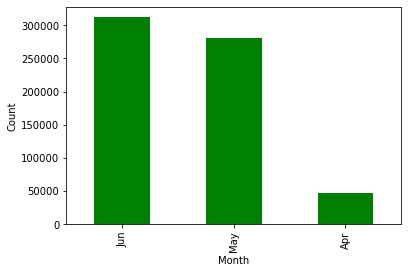

In [19]:
byDay = traindf.groupby(by=["Month"])["emotion"].sum()
ax=byDay.sort_values(ascending=False).plot(kind='bar',colormap="ocean",sort_columns=True)
ax.set_xlabel("Month")
ax.set_ylabel("Count");

#### Different from May and April number of negative tweets are higher than positives ones in June.

Text(0, 0.5, 'Count')

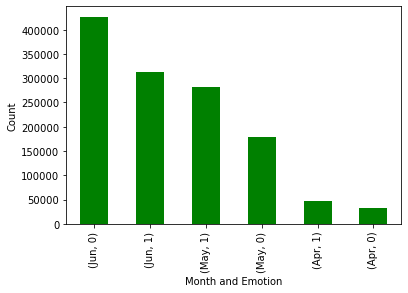

In [20]:
byDay = traindf.groupby(by=["Month","emotion"]).count()["Id"]
ax=byDay.sort_values(ascending=False).plot(kind='bar',colormap="ocean",sort_columns=True)
ax.set_xlabel("Month and Emotion")
ax.set_ylabel("Count")

#### The number of positive and negative tweets are almost same in Fridays however there is clear difference in other days.

Text(0, 0.5, 'Count')

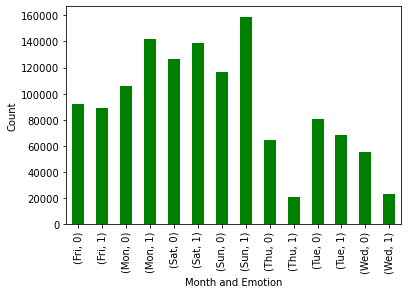

In [21]:
byDay = traindf.groupby(by=["Day of Week","emotion"]).count()["Id"]
ax=byDay.plot(kind='bar',colormap="ocean",sort_columns=True)
ax.set_xlabel("Month and Emotion")
ax.set_ylabel("Count")

#### The difference between number of positive and negative tweets is quite high for example in 20th, 23rd, 24th and 25th of the months.

Text(0, 0.5, 'Count')

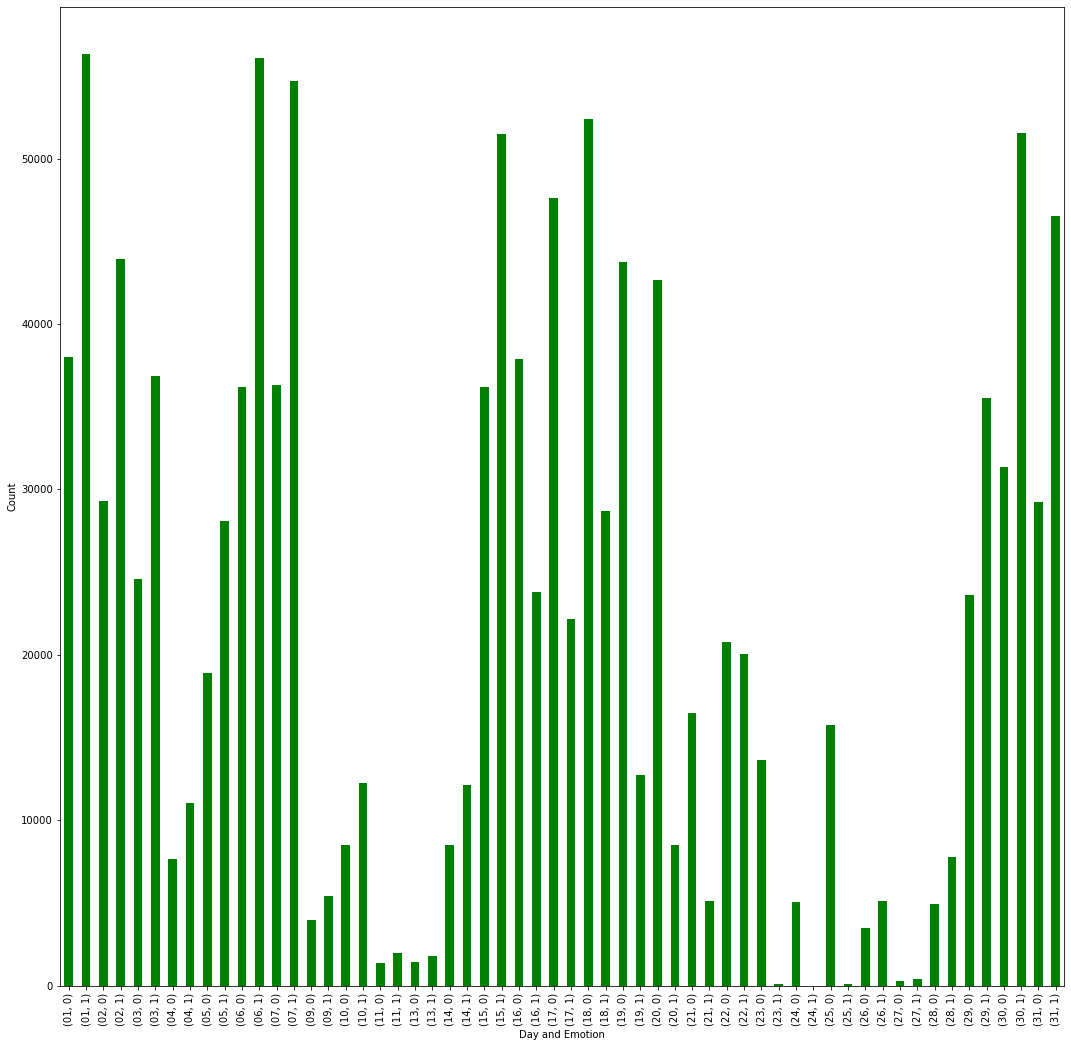

In [22]:
byDay = traindf.groupby(by=["Day","emotion"]).count()["Id"]
ax=byDay.plot(kind='bar',colormap="ocean",sort_columns=True, figsize=(18,18))
ax.set_xlabel("Day and Emotion")
ax.set_ylabel("Count")

#### There is always a difference between number of positive and negative tweets in each hour.

Text(0, 0.5, 'Count')

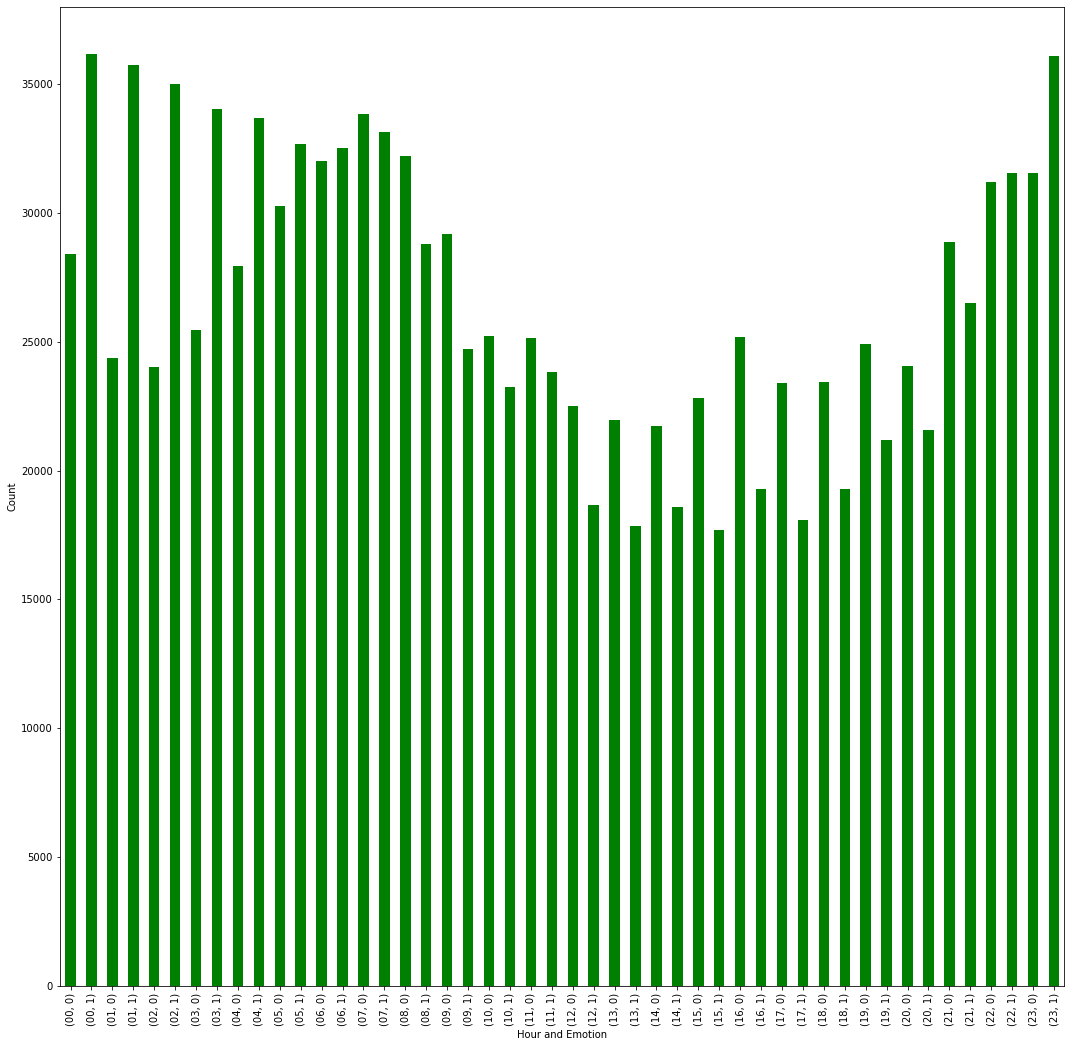

In [23]:
byDay = traindf.groupby(by=["Hour","emotion"]).count()["Id"]
ax=byDay.plot(kind='bar',colormap="ocean",sort_columns=True, figsize=(18,18))
ax.set_xlabel("Hour and Emotion")
ax.set_ylabel("Count")

## Data Cleaning

In general we will work on the text column and therefore we will remove the items which does not contribute like stopwords, tags, punctuations.

In [24]:
stop = stopwords.words('english') #stopwords in english 
stop[:5] #5 stopwords

['i', 'me', 'my', 'myself', 'we']

In [25]:
#method for removing word duplicates in each row
def unique_list(l):
    ulist = []
    [ulist.append(x) for x in l if x not in ulist]
    return ulist

#### We are working with a dataset which is very noisy. Therefore, we built a function to remove the unnecessary parts like punctuations, stopwords, whitespaces, numbers, hashtags, usernames etc. from text column with regex methods. Each regex method has explanation comment. 

In [26]:
stop = stopwords.words('english')
#Lemmatization
lemmatizer = WordNetLemmatizer()
def cleanText(data):
    data['cleaned_text'] =data['text'].apply(lambda x: " ".join(x.lower() for x in x.split())) #transform lowercase
    data['cleaned_text'] =data['cleaned_text'].apply(lambda x: " ".join(contractions.fix(x) for x in x.split())) #Fixes contractions such as `you're` to you are
    data['cleaned_text'] =data['cleaned_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #removing stopwords
    data['cleaned_text'] =data['cleaned_text'].apply(lambda x: " ".join(re.sub('@[\w]+','',x) for x in x.split())) #removing usernames @jessica42
    data['cleaned_text'] =data['cleaned_text'].apply(lambda x: " ".join(x for x in x.split() if not x.startswith('#')))#removin hashtags like #quoteoftheday
    data['cleaned_text'] =data['cleaned_text'].str.replace(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ',regex=True) #removing special characters, urls and punctuations
    data['cleaned_text'] =data['cleaned_text'].apply(lambda x: " ".join(re.sub('\W+',' ',x) for x in x.split())) #separating the words which have special character inside The Hills&Band -> Hills Band
    data['cleaned_text'] =data['cleaned_text'].str.replace(r'[^\w\s]','',regex=True) #removing everything except words and whitespaces
    data['cleaned_text'] =data['cleaned_text'].apply(lambda x: " ".join(re.sub(r'[0-9]', " ", x) for x in x.split())) #removing numbers in words like temp42->temp
    data['cleaned_text'] =data['cleaned_text'].apply(lambda x: " ".join(lemmatizer.lemmatize(x) for x in x.split())) #lemmatization of words like rocks : rock
    data['cleaned_text'] =data['cleaned_text'].apply(lambda x: " ".join(re.sub(' +', " ", x) for x in x.split())) #removing unnecessary whitespaces
    data['cleaned_text'] =data['cleaned_text'].apply(lambda x: " ".join(re.sub(r'[^\x00-\x7f]',r'',x) for x in x.split())) #removing non-latin characters and words
    data['cleaned_text'] =data['cleaned_text'].str.replace('_', '',regex=True) #remove _in words like to_day->today
    data['cleaned_text'] =data['cleaned_text'].str.replace(r'\b(\w{1,2})\b',' ',regex=True) #removing strings which have less length than 3. ah,to,etc.
    data['cleaned_text_len'] =data['cleaned_text'].apply(lambda x:len(re.findall(r'\w+', x))) # finding length of cleaned tex column
    data['cleaned_text'] =data['cleaned_text'].apply(lambda x: " ".join(unique_list(x.split()))) #removing one of duplicate words in each rows
    return data



In [27]:
%%time
traindfcleaned = cleanText(traindf)
testdfcleaned= cleanText(testdf)

Wall time: 5min 27s


In [28]:
traindfcleaned.head()

,Id,emotion,tweet_id,date,lyx_query,user,text,text_len,Day of Week,Month,Day,Time,Time Zone,Year,Hour,cleaned_text,cleaned_text_len
0,0,1,2063391019,Sun Jun 07 02:28:13 PDT 2009,NO_QUERY,BerryGurus,@BreeMe more time to play with you BlackBerry ...,9,Sun,Jun,07,02:28:13,PDT,2009,02,time play blackberry,3
1,1,0,2000525676,Mon Jun 01 22:18:53 PDT 2009,NO_QUERY,peterlanoie,Failed attempt at booting to a flash drive. Th...,26,Mon,Jun,01,22:18:53,PDT,2009,22,failed attempt booting flash drive switching p...,13
2,2,0,2218180611,Wed Jun 17 22:01:38 PDT 2009,NO_QUERY,will_tooker,@msproductions Well ain't that the truth. Wher...,26,Wed,Jun,17,22:01:38,PDT,2009,22,well truth damn auto lock disable copy paste g...,13
3,3,1,2190269101,Tue Jun 16 02:14:47 PDT 2009,NO_QUERY,sammutimer,@Meaghery cheers Craig - that was really sweet...,14,Tue,Jun,16,02:14:47,PDT,2009,02,cheer craig really sweet reply pumped,6
4,4,0,2069249490,Sun Jun 07 15:31:58 PDT 2009,NO_QUERY,ohaijustin,I was reading the tweets that got send to me w...,29,Sun,Jun,07,15:31:58,PDT,2009,15,reading tweet got send lying phone face droppe...,11


In [29]:
testdfcleaned.head()

,Id,tweet_id,date,lyx_query,user,text,Day of Week,Month,Day,Time,Time Zone,Year,Hour,cleaned_text,cleaned_text_len
0,0,2013329963,Tue Jun 02 22:25:12 PDT 2009,NO_QUERY,JeffreyNam,working add oil,Tue,Jun,02,22:25:12,PDT,2009,22,working add oil,3
1,1,1998107018,Mon Jun 01 18:00:16 PDT 2009,NO_QUERY,NKANGEL74,@KristianaNKOTB you're welcome,Mon,Jun,01,18:00:16,PDT,2009,18,welcome,1
2,2,1693461347,Sun May 03 22:37:21 PDT 2009,NO_QUERY,allyfish87,"is going to bed, work in the morning boo but t...",Sun,May,03,22:37:21,PDT,2009,22,going bed work morning boo get see,7
3,3,1882992096,Fri May 22 07:49:50 PDT 2009,NO_QUERY,drcharlii,@sparky_habbo - uni &amp; assignments happened...,Fri,May,22,07:49:50,PDT,2009,07,uni amp assignment happened goodnight sparkle,6
4,4,2266811610,Sun Jun 21 09:08:26 PDT 2009,NO_QUERY,elizuhhbef,Can't wait to have chinese food! Still disappo...,Sun,Jun,21,09:08:26,PDT,2009,09,wait chinese food still disappointed ocharleys...,10


In [30]:
%%time
traindfcleaned["cleaned_text"].str.split(expand=True).stack().value_counts()[:20]

Wall time: 14.6 s


day       81742
good      70059
going     68419
get       66416
like      61261
got       54727
today     53883
love      53473
work      52775
time      50596
want      50103
lol       44953
back      44109
one       43651
know      41583
really    37542
see       36274
night     34713
amp       34448
think     34406
dtype: int64

#### Word frequency dataframe

In [31]:
a = traindfcleaned['cleaned_text'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
result = pd.DataFrame(word_dist.most_common(50),
                    columns=['Word', 'Frequency'])
result

,Word,Frequency
0,day,81742
1,good,70059
2,going,68419
3,get,66416
4,like,61261
5,got,54727
6,today,53883
7,love,53473
8,work,52775
9,time,50596


#### Wordcloud of most common 50 words

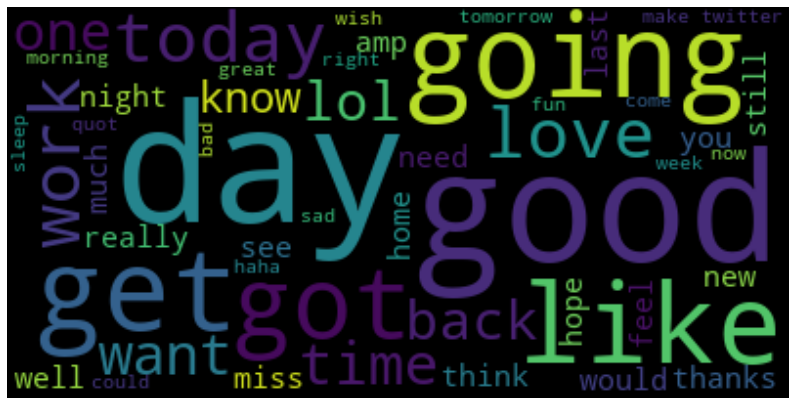

In [32]:
tuples = [tuple(x) for x in result.values]
wordcloud = WordCloud().generate_from_frequencies(dict(tuples))

plt.figure(figsize=(14,14))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Tokenization 

In [33]:
y_train = traindf["emotion"] #Labels

#### We used TFIDF tokenization for text data.
The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus.

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer

#### TFIDF vectorization for traindf text column

In [34]:
%%time
tfidf = TfidfVectorizer(stop_words = 'english', analyzer="word", ngram_range=(1,2))
tfidf.fit(traindf["text"])
tfidf_train = tfidf.transform(traindf["text"])
tfidf_test = tfidf.transform(testdf["text"])

Wall time: 2min 7s


#### TFIDF vectorization for traindfcleaned cleaned_text column

In [35]:
%%time
tfidf2 = TfidfVectorizer(stop_words = 'english', analyzer="word", ngram_range=(1,2))
tfidf2.fit(traindfcleaned["cleaned_text"])
tfidf_train2 = tfidf2.transform(traindfcleaned["cleaned_text"])
tfidf_test2 = tfidf2.transform(testdfcleaned["cleaned_text"])

Wall time: 1min 29s


In [36]:
print(tfidf_train.shape)
print(tfidf_test.shape)

(1280000, 4573594)
(320000, 4573594)


In [37]:
print(tfidf.get_params)

<bound method BaseEstimator.get_params of TfidfVectorizer(ngram_range=(1, 2), stop_words='english')>


In [38]:
print(tfidf_train2.shape)
print(tfidf_test2.shape)

(1280000, 2993773)
(320000, 2993773)


#### In order to concatenate with TFIDF sparse matrix we changed dummified numerical columns to sparse matrix.

In [39]:
newTrainSparse = newtraindfdum.astype(pd.SparseDtype())
newTestSparse = newtestdfdum.astype(pd.SparseDtype())
newTrainSparse.head()

,Day of Week_Mon,Day of Week_Sat,Day of Week_Sun,Day of Week_Thu,Day of Week_Tue,Day of Week_Wed,Month_Jun,Month_May,Day_02,Day_03,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
newTestSparse.head()

,Day of Week_Mon,Day of Week_Sat,Day of Week_Sun,Day of Week_Thu,Day of Week_Tue,Day of Week_Wed,Month_Jun,Month_May,Day_02,Day_03,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Concatenation of TFIDF sparse matrix with numerical sparse matrix

#### Concatenation with text column

In [41]:
newtfidf_train = hstack([tfidf_train,newTrainSparse])
newtfidf_test = hstack([tfidf_test,newTestSparse])

#### Concatenation with cleaned text column

In [42]:
newtfidf_train2 = hstack([tfidf_train2,newTrainSparse])
newtfidf_test2 = hstack([tfidf_test2,newTestSparse])

# Implementation of Machine Learning Algortihms

Lasso regularized logistic regression and linear support vector classifier are used for the project and presented below. The rationale behind using those algorithms are the following:

1) They can be used with the sparse matrix data, which is not the case with other algorithms, such as neural networks. <br>
2) They required relatively small time to be fitted on the data compared to other algorithms (not included in notebook) like k nearest neighbors and random forest classifier which took a lot of time to run but did not finish even after several hours. <br>
3) These two algorithms taught in Machine Learning class.<br>


#### Before each submission to Kaggle we splitted train data into train and test to assess algorithms accuracy levels.

In [43]:
y_train = traindf["emotion"] #labels

In [47]:
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [48]:
LinearSVC().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'multi_class', 'penalty', 'random_state', 'tol', 'verbose'])

#### Train and test split on training data which concatenated with expanded date column.

In [49]:
X_train,X_test,y_train2,y_test = train_test_split(newtfidf_train,y_train,test_size=0.2,random_state=42,shuffle=True)

### Cross Validation

In [52]:
features = np.arange(1,10, 1)/10
params_svc= {"C": features}
params_svc

{'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])}

#### Cross validation for C parameters in LinearSVC
Warning: This cell is computationally costly we suggest instead of running this cell directly run the cell with best parameters. LinearSVC(C=0.3)

In [53]:
folds = KFold(n_splits = 5, random_state=42, shuffle=True)

LinCV = GridSearchCV(
    estimator=LinearSVC(),
    param_grid={"C": features},
    scoring="accuracy",
    cv=folds, n_jobs=-2
)

In [54]:
LinCV.fit(X_train, y_train2)
LinCVBest = LinCV.best_estimator_
LinCVBest.get_params

<bound method BaseEstimator.get_params of LinearSVC(C=0.3)>

In [56]:
clf = LinearSVC(C=0.3)
clf.fit(X_train, y_train2)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.82530859375

#### Cross validation for C parameters in Logistic Regression
Warning: This cell is computationally costly we suggest instead of running this cell directly run the cell with best parameters. LogisticRegression(C=0.9, max_iter=1000, penalty='l1', solver='liblinear')

In [59]:
folds = KFold(n_splits = 5, random_state=42, shuffle=True)

LogRegCV = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000,solver="liblinear",penalty='l1'),
    param_grid={"C": features},
    scoring="accuracy",
    cv=folds, n_jobs=-2
)

In [60]:
LogRegCV.fit(X_train, y_train2)
LogRegCVBest = LogRegCV.best_estimator_
LogRegCVBest.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=0.9, max_iter=1000, penalty='l1', solver='liblinear')>

In [61]:
clf = LogisticRegression(C=0.9, max_iter=1000, penalty='l1', solver='liblinear')
clf.fit(X_train, y_train2)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.82090234375

#### Train and test split on cleaned training data which concatenated with expanded date column.

In [63]:
X_train,X_test,y_train2,y_test = train_test_split(newtfidf_train2,y_train,test_size=0.2,random_state=42,shuffle=True)

#### Fitting LinearSVC on cleaned train data. 

In [64]:
clf = LinearSVC(C=0.3)
clf.fit(X_train, y_train2)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8126015625

#### Fitting Logistic Regression on cleaned train data. 

In [65]:
clf = LogisticRegression(C=0.9, max_iter=1000, penalty='l1', solver='liblinear')
clf.fit(X_train, y_train2)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.81188671875

#### Final fitting and prediction with best classifier

In [70]:
%%time
clf = LinearSVC(C=0.3)
clf.fit(newtfidf_train, y_train)
y_predfinal = clf.predict(newtfidf_test)

Wall time: 37.7 s


#### Submission Dataframe

In [71]:
submission = pd.DataFrame(y_predfinal)
submission["Id"] = submission.index
submission = submission.rename({0: "emotion"}, axis=1)
submission = submission[["Id","emotion"]]
print(submission[1:20])
submission.shape


    Id  emotion
1    1        1
2    2        0
3    3        0
4    4        0
5    5        1
6    6        1
7    7        0
8    8        1
9    9        0
10  10        0
11  11        0
12  12        0
13  13        0
14  14        0
15  15        1
16  16        0
17  17        1
18  18        0
19  19        1


(320000, 2)

In [72]:
submission.to_csv('submission25.csv', index=False) 

# Conclusion

After completing all the steps in content of notebook we reached the following results. 

- We used two main classification algorithms which are Logistic Regression and LinearSVC.
- Tfidf vectorizer used with n_range=(1,2). 
- The highest accuracy we got from test set provided was 0.8253 from LinearSVC(C=0.3) and 0.8209 LogisticRegression(C=0.9, max_iter=1000, penalty='l1', solver='liblinear')algorithm.However the text column we used was from the original training set without cleaning but with expanded date column features.
- After using the cleaned_text column with expanded date column features from traindfcleaned we got accuracy 0.8126 from LinearSVC and 0.8118 from Logisitic Regression.
- We used 5-Fold cross validation for tuning C hyperparameter.
- We used dummified expanded date columns as predictor variables.
- When we compare the results from training data(train-test split results) and kaggle submission we saw that the results were close. Therefore, before each submission we assessed the performance of the each algorithm.
